# Table of Contents

### 1. Data Exploration & Pre-Processing
### 2. Implementation of Machine Learning Algorithms
> 2.1 Data Split   
> 2.2 Linear Regression   
> 2.3 Polynomial Regression   
> 2.4 Ridge Regression Regularization   
> 2.5 LASSO   
> 2.6 Support Vector Regressor   
> 2.7 Decision Tree Regressor   
> 2.8 Random Forest Regressor   
> 2.9 XGBoost   
> 2.10 Gradient Boosting Regressor   
> 2.11 Neural Network   

### 3. Summary
<hr>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import copy, math
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from scikeras.wrappers import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras


# 1. Data Exploration & Pre-Processing

In [17]:
# Load dataset
df = pd.read_csv("dataset.csv")

,Cases,Axial Pitch,Minor Rad,Coil Radius,n Turn,Velocity,Hydrogen
0,1,20.0,2,10.0,1,1.500,971.182920
1,2,20.0,2,10.0,1,2.375,950.952133
2,3,20.0,2,10.0,1,3.250,943.661781
3,4,20.0,2,10.0,1,4.125,938.589189
4,5,20.0,2,10.0,1,5.000,935.706445
...,...,...,...,...,...,...,...
2595,2596,60.0,6,15.0,4,1.500,709.748880
2596,2597,60.0,6,15.0,4,2.375,704.031916
2597,2598,60.0,6,15.0,4,3.250,709.750169
2598,2599,60.0,6,15.0,4,4.125,708.392507


In [18]:
df.drop(['Cases'], axis=1, inplace=True)

In [19]:
df

,Axial Pitch,Minor Rad,Coil Radius,n Turn,Velocity,Hydrogen
0,20.0,2,10.0,1,1.500,971.182920
1,20.0,2,10.0,1,2.375,950.952133
2,20.0,2,10.0,1,3.250,943.661781
3,20.0,2,10.0,1,4.125,938.589189
4,20.0,2,10.0,1,5.000,935.706445
...,...,...,...,...,...,...
2595,60.0,6,15.0,4,1.500,709.748880
2596,60.0,6,15.0,4,2.375,704.031916
2597,60.0,6,15.0,4,3.250,709.750169
2598,60.0,6,15.0,4,4.125,708.392507


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Axial Pitch  2600 non-null   float64
 1   Minor Rad    2600 non-null   int64  
 2   Coil Radius  2600 non-null   float64
 3   n Turn       2600 non-null   int64  
 4   Velocity     2600 non-null   float64
 5   Hydrogen     2559 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 122.0 KB


In [21]:
df.describe()

,Axial Pitch,Minor Rad,Coil Radius,n Turn,Velocity,Hydrogen
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2559.000000
mean,37.401709,3.576923,12.740385,4.207692,3.250000,670.943805
std,12.155643,1.485419,1.977388,2.411005,1.237675,141.365423
min,20.000000,2.000000,10.000000,1.000000,1.500000,347.492361
25%,28.888889,2.000000,10.000000,2.000000,2.375000,574.196015
50%,37.777778,4.000000,12.500000,4.000000,3.250000,654.825421
75%,46.666667,4.000000,15.000000,6.000000,4.125000,750.811604
max,60.000000,6.000000,15.000000,10.000000,5.000000,979.297218


In [22]:
# Check null
df.isnull().sum()

Axial Pitch     0
Minor Rad       0
Coil Radius     0
n Turn          0
Velocity        0
Hydrogen       41
dtype: int64

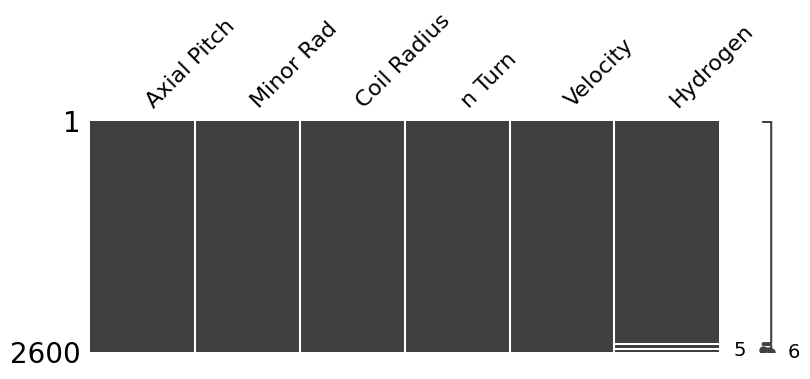

In [23]:
msno.matrix(df, figsize=(9,3))
plt.show()

In [24]:
# Remove nulls
df.dropna(inplace=True)

In [25]:
# Check null again
df.isnull().sum()

Axial Pitch    0
Minor Rad      0
Coil Radius    0
n Turn         0
Velocity       0
Hydrogen       0
dtype: int64

In [26]:
df

,Axial Pitch,Minor Rad,Coil Radius,n Turn,Velocity,Hydrogen
0,20.0,2,10.0,1,1.500,971.182920
1,20.0,2,10.0,1,2.375,950.952133
2,20.0,2,10.0,1,3.250,943.661781
3,20.0,2,10.0,1,4.125,938.589189
4,20.0,2,10.0,1,5.000,935.706445
...,...,...,...,...,...,...
2595,60.0,6,15.0,4,1.500,709.748880
2596,60.0,6,15.0,4,2.375,704.031916
2597,60.0,6,15.0,4,3.250,709.750169
2598,60.0,6,15.0,4,4.125,708.392507


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559 entries, 0 to 2599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Axial Pitch  2559 non-null   float64
 1   Minor Rad    2559 non-null   int64  
 2   Coil Radius  2559 non-null   float64
 3   n Turn       2559 non-null   int64  
 4   Velocity     2559 non-null   float64
 5   Hydrogen     2559 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 139.9 KB


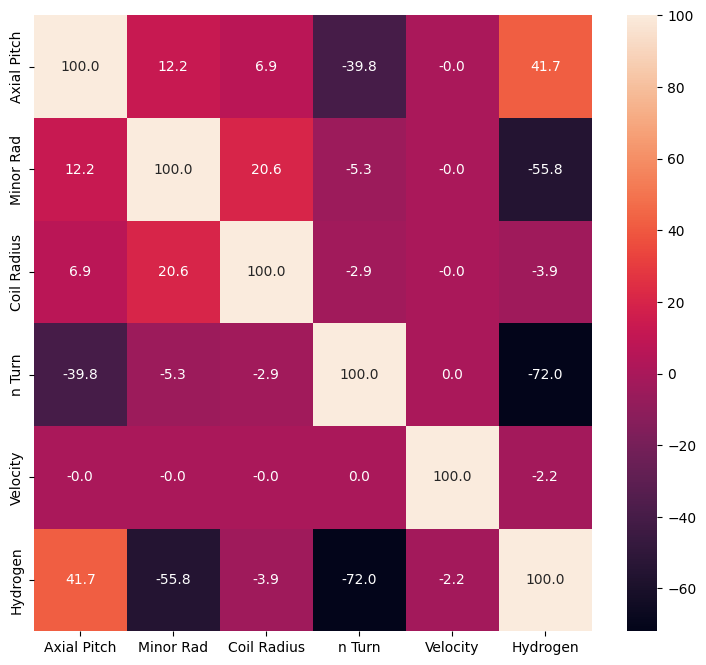

In [29]:
# Correlation heatmap
plt.figure(figsize=(9,8))
sns.heatmap(df.corr()*100, annot=True, fmt='.1f')
plt.show()

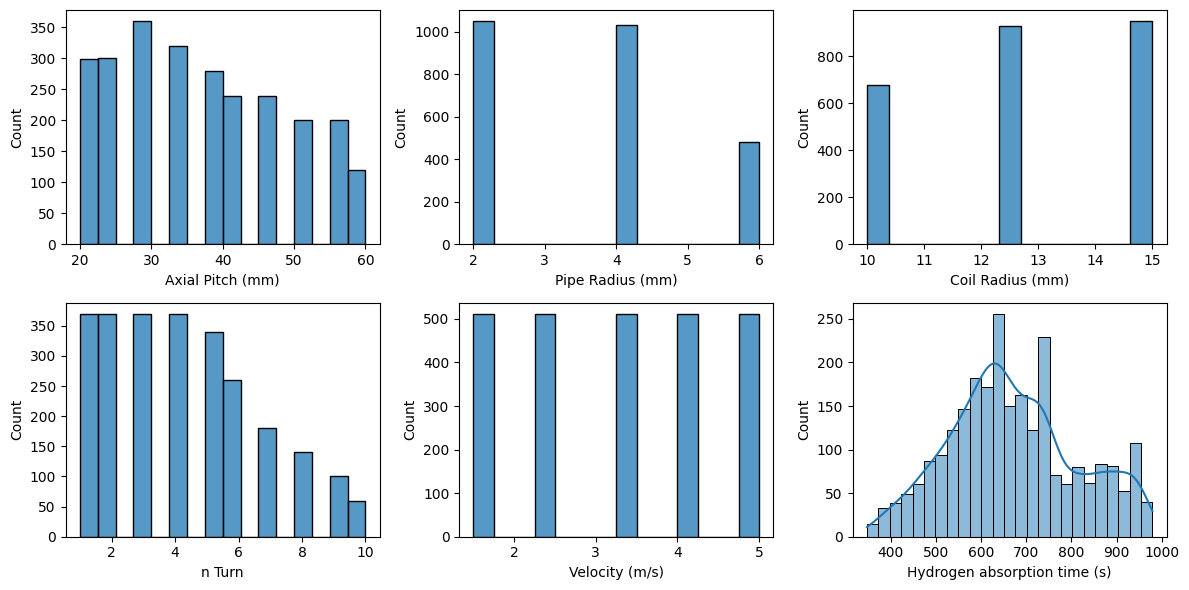

In [33]:
# Variable histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6), dpi=100)
sns.histplot(x=df['Axial Pitch'], ax = axes[0][0])
sns.histplot(df['Minor Rad'], ax = axes[0][1])
sns.histplot(df['Coil Radius'], ax = axes[0][2])
sns.histplot(df['n Turn'], ax = axes[1][0])
sns.histplot(df['Velocity'], ax = axes[1][1])
sns.histplot(df['Hydrogen'], ax = axes[1][2], kde=True)
plt.tight_layout()

axes[0][0].set_xlabel('Axial Pitch (mm)')
axes[0][1].set_xlabel('Pipe Radius (mm)')
axes[0][2].set_xlabel('Coil Radius (mm)')
axes[1][0].set_xlabel('n Turn')
axes[1][1].set_xlabel('Velocity (m/s)')
axes[1][2].set_xlabel('Hydrogen absorption time (s)')

plt.show()

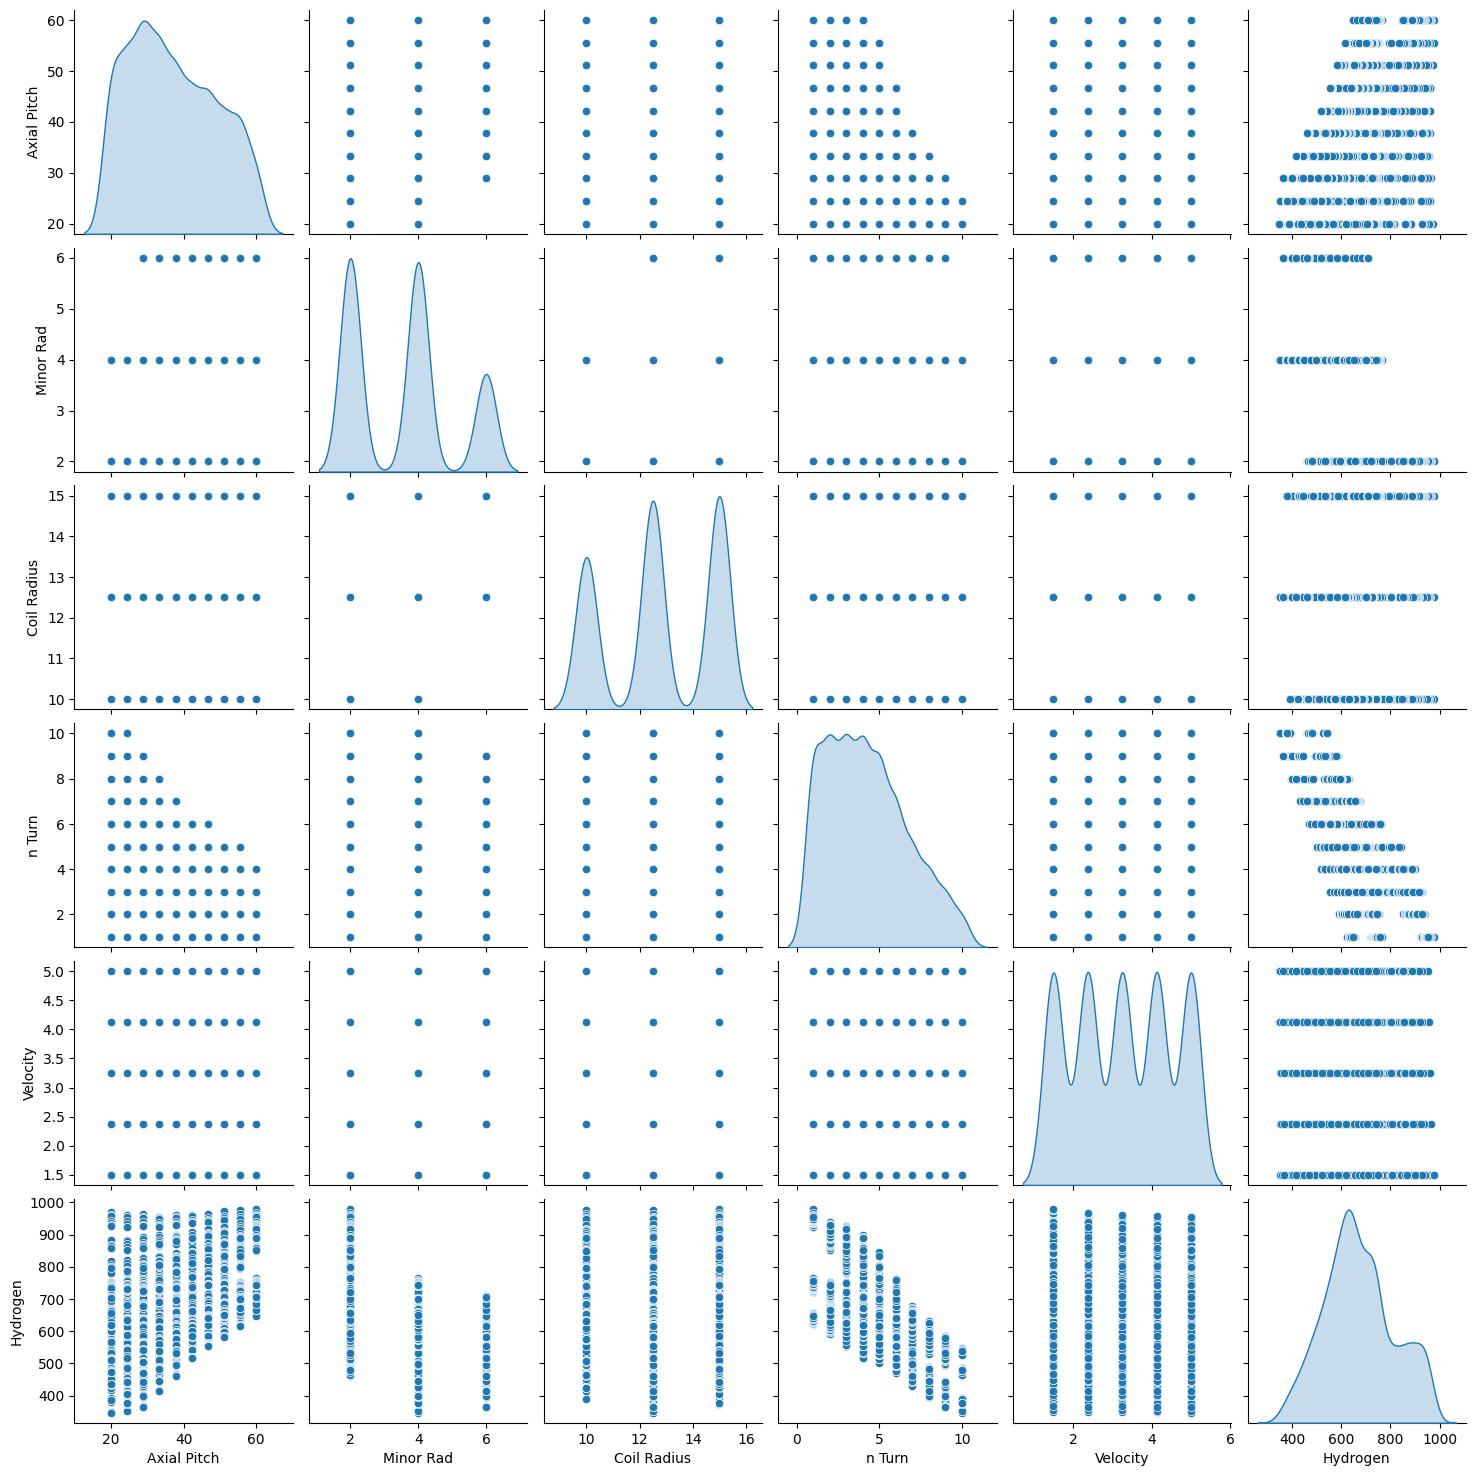

<Figure size 2000x1200 with 0 Axes>

In [34]:
# Variable pariplot
sns.pairplot(data=df, diag_kind='kde')
plt.figure(figsize=(20,12))
plt.show()

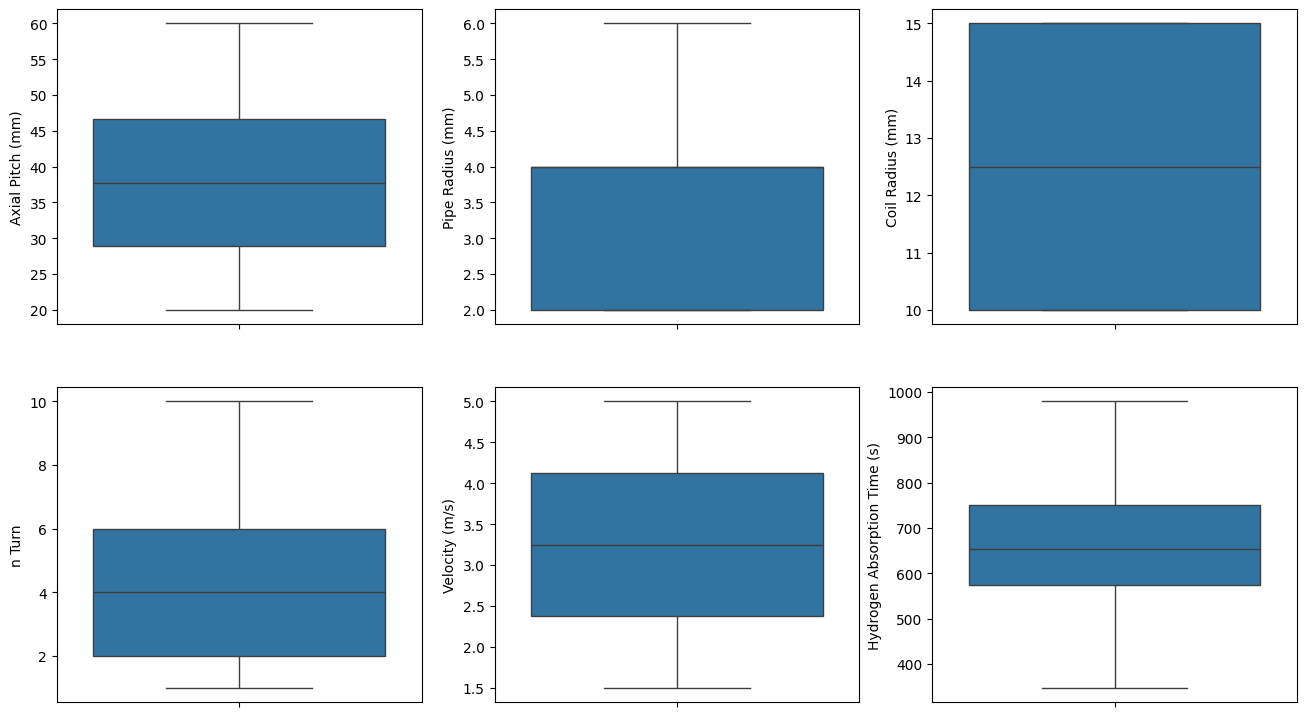

In [37]:
# Observation using boxplot
ncols = 3
nrows = math.ceil(len(df.columns)/3)
nFeature = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,9), dpi=100)
for row in range(nrows):
    for col in range(ncols):
        if nFeature < len(df.columns):
            sns.boxplot(df[df.columns[nFeature]], ax = axes[row][col])
        nFeature += 1

# 2. Implementation of Machine Learning Algorithms

## 2.1 Data Split

In [41]:
X = df.drop(['Hydrogen'], axis=1)
y = df['Hydrogen']

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)

(2047, 5)
(512, 5)


In [44]:
# Apply normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
# Define functions of metrics for data evaluation

# Outputs R-squared
def find_r2(y_train, y_train_pred, y_test, y_test_pred):
    return r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred) 

# Outputs Mean Absolute Error
def find_mae(y_train, y_train_pred, y_test, y_test_pred):
    return mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred) 

# Outputs Mean Squared Error
def find_mse(y_train, y_train_pred, y_test, y_test_pred):
    return mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred) 

# Outputs Root Mean Squared Error
def find_rmse(y_train, y_train_pred, y_test, y_test_pred):
    return np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))

# Outputs Mean Absolute Percentage Error
def find_mape(y_train, y_train_pred, y_test, y_test_pred):
    return mean_absolute_percentage_error(y_train, y_train_pred), mean_absolute_percentage_error(y_test, y_test_pred)

In [54]:
# Prints all metrics
def print_metrics(r2_train, r2_test, mae_train, mae_test, mse_train, mse_test, rmse_train, rmse_test, mape_train, mape_test):
    print(f"MAE:    {mae_train:.2f} vs {mae_test:.2f}")
    print(f"MSE:    {mse_train:.2f} vs {mse_test:.2f}")
    print(f"RMSE:   {rmse_train:.2f} vs {rmse_test:.2f}")
    print(f"MAPE:   {mape_train:.2f} vs {mape_test:.2f}")
    print(f"R2:     {r2_train:.4f} vs {r2_test:.4f}")

In [55]:
# Outputs R-squared plots
def print_r2_plots(y_train, y_train_pred, y_test, y_test_pred, r2_train, r2_test):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

    sns.regplot(x=y_train, y=y_train_pred, fit_reg=True, line_kws=dict(color="r"), ax=ax1)
    sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws=dict(color="r"), ax=ax2)

    ax1.set_title(f'Train\nR2: {r2_train:.4f}')
    ax1.set_xlabel('Actual (s)')
    ax1.set_ylabel('Predicted (s)')

    ax2.set_title(f'Test\nR2: {r2_test:.4f}')
    ax2.set_xlabel('Actual (s)')
    ax2.set_ylabel('Predicted (s)')

    plt.show()

## 2.2 Linear Regression

In [56]:
# Create a linear regression instance
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
# Split into train and test sets
lr_y_train_pred = lr.predict(X_train_scaled)
lr_y_test_pred = lr.predict(X_test_scaled)

In [149]:
# Print metric values
lr_r2_train, lr_r2_test = find_r2(y_train,lr_y_train_pred, y_test, lr_y_test_pred)

lr_mae_train, lr_mae_test = find_mae(y_train, lr_y_train_pred, y_test, lr_y_test_pred)

lr_mse_train, lr_mse_test = find_mse(y_train, lr_y_train_pred, y_test, lr_y_test_pred)

lr_rmse_train, lr_rmse_test = find_rmse(y_train, lr_y_train_pred, y_test, lr_y_test_pred)

lr_mape_train, lr_mape_test = find_mape(y_train, lr_y_train_pred, y_test, lr_y_test_pred)

print_metrics(lr_r2_train, lr_r2_test, lr_mae_train, lr_mae_test, lr_mse_train, lr_mse_test, lr_rmse_train, lr_rmse_test, lr_mape_train, lr_mape_test)

MAE:    32.52 vs 31.85
MSE:    1599.00 vs 1520.31
RMSE:   39.99 vs 38.99
MAPE:   0.05 vs 0.05
R2:     0.9204 vs 0.9221


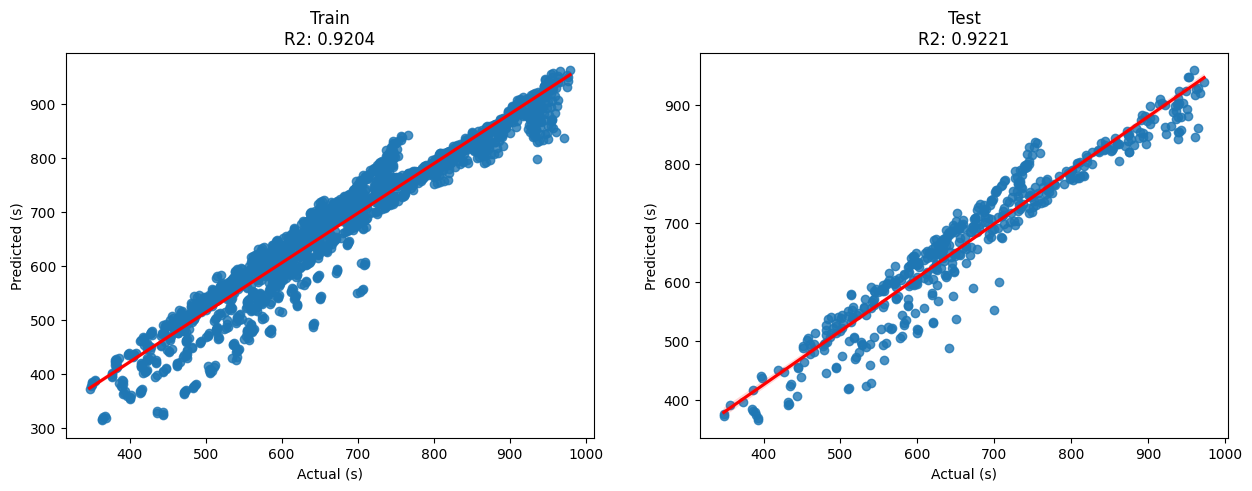

In [150]:
print_r2_plots(y_train, lr_y_train_pred, y_test, lr_y_test_pred, lr_r2_train, lr_r2_test)

## 2.3 Polynomial Regression

In [151]:
# Create a polynomial regression instance
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.fit_transform(X_test_scaled)

In [152]:
# Create a linear regression instance
poly_lr = LinearRegression()
poly_lr.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [153]:
# Split into train and test sets
poly_y_train_pred = poly_lr.predict(X_train_scaled_poly)
poly_y_test_pred = poly_lr.predict(X_test_scaled_poly)

MAE:    10.69 vs 10.32
MSE:    204.67 vs 191.99
RMSE:   14.31 vs 13.86
MAPE:   0.02 vs 0.02
R2:     0.9898 vs 0.9902


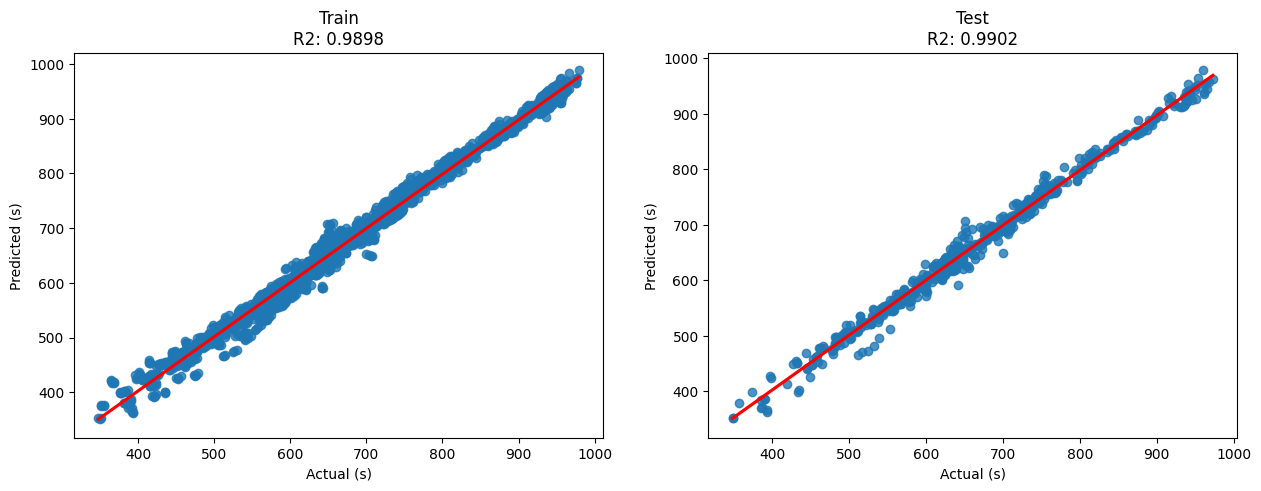

In [154]:
# Print metric values
poly_r2_train, poly_r2_test = find_r2(y_train,poly_y_train_pred, y_test, poly_y_test_pred)

poly_mae_train, poly_mae_test = find_mae(y_train, poly_y_train_pred, y_test, poly_y_test_pred)

poly_mse_train, poly_mse_test = find_mse(y_train, poly_y_train_pred, y_test, poly_y_test_pred)

poly_rmse_train, poly_rmse_test = find_rmse(y_train, poly_y_train_pred, y_test, poly_y_test_pred)

poly_mape_train, poly_mape_test = find_mape(y_train, poly_y_train_pred, y_test, poly_y_test_pred)

print_metrics(poly_r2_train, poly_r2_test, poly_mae_train, poly_mae_test, poly_mse_train, poly_mse_test, poly_rmse_train, poly_rmse_test, poly_mape_train, poly_mape_test)

print_r2_plots(y_train, poly_y_train_pred, y_test, poly_y_test_pred, poly_r2_train, poly_r2_test)

## 2.4 Ridge Regression Regularization

In [155]:
# Create a pipeline
rr_pipeline = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), ('model', Ridge())])

In [156]:
# Apply cross-validation
rr_kf = KFold(n_splits=10, shuffle= True, random_state= 17)
rr_val_scores = cross_val_score(estimator=rr_pipeline,  X= X_train, y= y_train, cv= rr_kf)
rr_val_scores.mean()

0.9894199740647771

In [157]:
# Apply hyperparameter tuning
rr_parameters = [ {
     "poly__degree": np.arange(1,3),
     "model__alpha": np.linspace(1e-3,1),
     "model__fit_intercept": [True, False],
     "model__max_iter": np.arange(50,2000),
     "model__tol": np.linspace(1e-3, 1),
     "model__solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    }]
rr_random = RandomizedSearchCV(
    estimator = rr_pipeline, 
    param_distributions=rr_parameters,
    scoring = 'r2',
    cv = rr_kf,
    verbose=True,
    n_jobs = -1,
    n_iter=100
    )
rr_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\Siwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Siwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Siwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('poly', PolynomialFeatures()),
                                             ('model', Ridge())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'model__alpha': array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487...
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ]),
                                         'poly__degree': array([1, 2])}],
                   scoring='r2', verbose=True)

In [158]:
rr_random.best_params_

{'poly__degree': 2,
 'model__tol': 0.898061224489796,
 'model__solver': 'auto',
 'model__max_iter': 1522,
 'model__fit_intercept': True,
 'model__alpha': 0.673795918367347}

In [159]:
rr_random.best_score_

0.9894199700164442

In [160]:
rr_degree = rr_random.best_params_['poly__degree']
rr_tol = rr_random.best_params_['model__tol']
rr_solver = rr_random.best_params_['model__solver']
rr_max_iter = rr_random.best_params_['model__max_iter']
rr_fit_intercept = rr_random.best_params_['model__fit_intercept']
rr_alpha = rr_random.best_params_['model__alpha']

In [161]:
# Apply a new pipeline with tuned hyperparameters
rr_random_chosen = Pipeline([('scaler', StandardScaler()), 
                             ('poly', PolynomialFeatures(degree=rr_degree)), 
                             ('model', Ridge(
                                 alpha=rr_alpha, 
                                 fit_intercept=rr_fit_intercept, 
                                 max_iter=rr_max_iter, 
                                 solver=rr_solver, 
                                 tol=rr_tol
                                )
                              )])
rr_random_chosen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model',
                 Ridge(alpha=0.673795918367347, max_iter=1522,
                       tol=0.898061224489796))])

In [162]:
rr_y_train_pred = rr_random_chosen.predict(X_train)
rr_y_test_pred = rr_random_chosen.predict(X_test)

MAE:    10.69 vs 10.32
MSE:    204.67 vs 192.08
RMSE:   14.31 vs 13.86
MAPE:   0.02 vs 0.02
R2:     0.9898 vs 0.9902


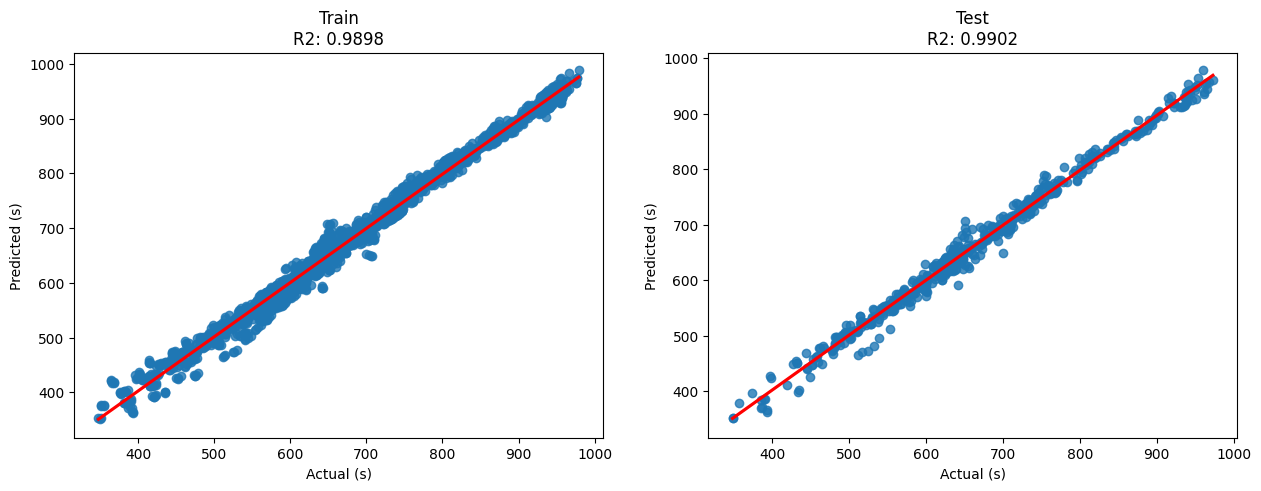

In [163]:
# Prints metrics
rr_r2_train, rr_r2_test = find_r2(y_train, rr_y_train_pred, y_test, rr_y_test_pred)

rr_mae_train, rr_mae_test = find_mae(y_train, rr_y_train_pred, y_test, rr_y_test_pred)

rr_mse_train, rr_mse_test = find_mse(y_train, rr_y_train_pred, y_test, rr_y_test_pred)

rr_rmse_train, rr_rmse_test = find_rmse(y_train, rr_y_train_pred, y_test, rr_y_test_pred)

rr_mape_train, rr_mape_test = find_mape(y_train, rr_y_train_pred, y_test, rr_y_test_pred)

print_metrics(rr_r2_train, rr_r2_test, rr_mae_train, rr_mae_test, rr_mse_train, rr_mse_test, rr_rmse_train, rr_rmse_test, rr_mape_train, rr_mape_test)

print_r2_plots(y_train, rr_y_train_pred, y_test, rr_y_test_pred, rr_r2_train, rr_r2_test)

## 2.5 LASSO

In [164]:
# Create a pipeline
lasso_pipeline = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), ('model', Lasso())])

In [165]:
# Apply cross-validation
lasso_kf = KFold(n_splits=10, shuffle= True, random_state= 17)
lasso_val_scores = cross_val_score(estimator=lasso_pipeline,  X= X_train, y= y_train, cv= lasso_kf)
lasso_val_scores.mean()

0.9881450475708732

In [166]:
# Apply hyperparameter tuning
lasso_parameters = [ {
     "poly__degree": np.arange(1,3),
     "model__alpha": np.linspace(0.001, 1),
     "model__fit_intercept": [True, False],
     "model__max_iter": np.arange(50, 2500),
     "model__tol": np.linspace(0.0001,10),
     "model__selection": ['cyclic', 'random']
    }]
lasso_random = RandomizedSearchCV(
    estimator = lasso_pipeline, 
    param_distributions=lasso_parameters,
    scoring = 'r2', 
    cv = lasso_kf,
    n_jobs = -1,
    n_iter=100
    )
lasso_random.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('poly', PolynomialFeatures()),
                                             ('model', Lasso())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'model__alpha': array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487...
       5.71432857e+00, 5.91840816e+00, 6.12248776e+00, 6.32656735e+00,
       6.53064694e+00, 6.73472653e+00, 6.93880612e+00, 7.14288571e+00,
       7.34696531e+00, 7.55104490e+00, 7.75512449e+00, 7.95920408e+00,
       8.16328367e+00, 8.36736327e+00, 8.57144286e+00, 8.77552245e+00,
       8.97960204e+00, 9.18368163e+00, 9.38776122e+00, 9.59184082e+00,
       9.79592041e+00, 1.00000000e+01]),
                                         'poly__degree': array([1, 2])}],
                   scoring='r2')

In [167]:
lasso_random.best_score_

0.9894000457935022

In [168]:
lasso_random.best_params_

{'poly__degree': 2,
 'model__tol': 0.0001,
 'model__selection': 'random',
 'model__max_iter': 136,
 'model__fit_intercept': True,
 'model__alpha': 0.12332653061224491}

In [169]:
lasso_degree = lasso_random.best_params_['poly__degree']
lasso_tol = lasso_random.best_params_['model__tol']
lasso_selection = lasso_random.best_params_['model__selection']
lasso_max_iter = lasso_random.best_params_['model__max_iter']
lasso_fit_intercept = lasso_random.best_params_['model__fit_intercept']
lasso_alpha = lasso_random.best_params_['model__alpha']

In [170]:
# Apply a new pipeline with tuned hyperparameters
lasso_random_chosen = Pipeline([('scaler', StandardScaler()), 
                                ('poly', PolynomialFeatures(degree=2)), 
                                ('model', Lasso(
                                    alpha=lasso_alpha, 
                                    fit_intercept=lasso_fit_intercept,
                                    max_iter=lasso_max_iter, 
                                    selection=lasso_selection, 
                                    tol=lasso_tol
                                    )
                                )])
lasso_random_chosen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model',
                 Lasso(alpha=0.12332653061224491, max_iter=136,
                       selection='random'))])

In [171]:
lasso_y_train_pred = lasso_random_chosen.predict(X_train)
lasso_y_test_pred = lasso_random_chosen.predict(X_test)

MAE:    10.70 vs 10.40
MSE:    205.15 vs 194.49
RMSE:   14.32 vs 13.95
MAPE:   0.02 vs 0.02
R2:     0.9898 vs 0.9900


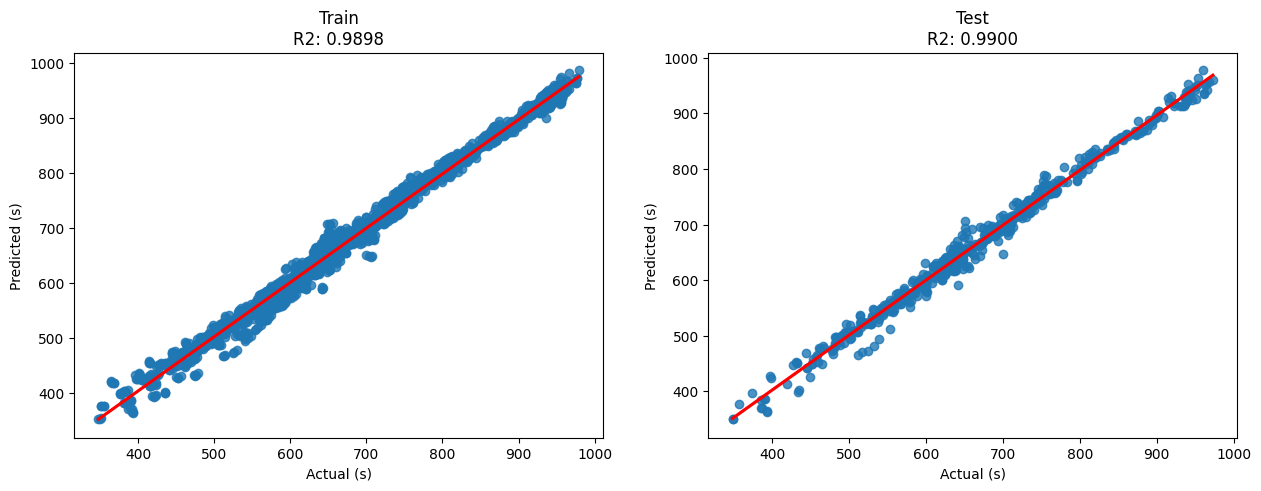

In [172]:
# Prints metrics
lasso_r2_train, lasso_r2_test = find_r2(y_train,lasso_y_train_pred, y_test, lasso_y_test_pred)

lasso_mae_train, lasso_mae_test = find_mae(y_train, lasso_y_train_pred, y_test, lasso_y_test_pred)

lasso_mse_train, lasso_mse_test = find_mse(y_train, lasso_y_train_pred, y_test, lasso_y_test_pred)

lasso_rmse_train, lasso_rmse_test = find_rmse(y_train, lasso_y_train_pred, y_test, lasso_y_test_pred)

lasso_mape_train, lasso_mape_test = find_mape(y_train, lasso_y_train_pred, y_test, lasso_y_test_pred)

print_metrics(lasso_r2_train, lasso_r2_test, lasso_mae_train, lasso_mae_test, lasso_mse_train, lasso_mse_test, lasso_rmse_train, lasso_rmse_test, lasso_mape_train, lasso_mape_test)

print_r2_plots(y_train, lasso_y_train_pred, y_test, lasso_y_test_pred, lasso_r2_train, lasso_r2_test)

## 2.6 Support Vector Regressor

In [173]:
# Create a pipeline with cross-validation
svr_pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVR())])
svr_kf = KFold(n_splits=10, shuffle= True, random_state= 17)
svr_val_scores = cross_val_score(estimator=svr_pipeline,  X= X_train, y= y_train, cv= svr_kf)
svr_val_scores.mean()

0.7881749172711182

In [142]:
# Apply hyperparameter tuning
svr_parameters = {
        'model__kernel': ['linear', 'rbf'],
        'model__degree': np.arange(1,4),
        'model__gamma': ['scale', 'auto'],
        'model__coef0': np.arange(0,5),
        'model__tol': np.linspace(1e-1,2),
        'model__C':  np.linspace(1e-2,0.5),
        'model__epsilon': np.linspace(1e-1, 1)
}

svr_random = RandomizedSearchCV(
        estimator = svr_pipeline, 
        param_distributions=svr_parameters,
        scoring = 'r2',
        cv = svr_kf,
        n_jobs = -1,
        n_iter=100,
        verbose=True
)

svr_random.fit(X_train, y_train)
svr_random.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.9152683128399278

In [143]:
svr_random.best_params_

{'model__tol': 0.3326530612244898,
 'model__kernel': 'linear',
 'model__gamma': 'auto',
 'model__epsilon': 0.8346938775510204,
 'model__degree': 2,
 'model__coef0': 4,
 'model__C': 0.45}

In [144]:
svr_tol = svr_random.best_params_['model__tol']
svr_kernel = svr_random.best_params_['model__kernel']
svr_gamma = svr_random.best_params_['model__gamma']
svr_epsilon = svr_random.best_params_['model__epsilon']
svr_degree = svr_random.best_params_['model__degree']
svr_coef0 = svr_random.best_params_['model__coef0']
svr_C = svr_random.best_params_['model__C']

In [145]:
# Apply a new pipeline with tuned hyperparameters
svr_random_chosen = Pipeline([('scaler', StandardScaler()), ('model', SVR(
    tol=svr_tol, 
    kernel=svr_kernel, 
    gamma=svr_gamma, 
    epsilon=svr_epsilon, 
    degree=svr_degree, 
    coef0=svr_coef0, 
    C=svr_C
    ))])
svr_random_chosen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SVR(C=0.45, coef0=4, degree=2, epsilon=0.8346938775510204,
                     gamma='auto', kernel='linear', tol=0.3326530612244898))])

In [175]:
svr_y_train_pred = svr_random_chosen.predict(X_train)
svr_y_test_pred = svr_random_chosen.predict(X_test)

MAE:    31.58 vs 31.48
MSE:    1676.90 vs 1595.37
RMSE:   40.95 vs 39.94
MAPE:   0.05 vs 0.05
R2:     0.9165 vs 0.9183


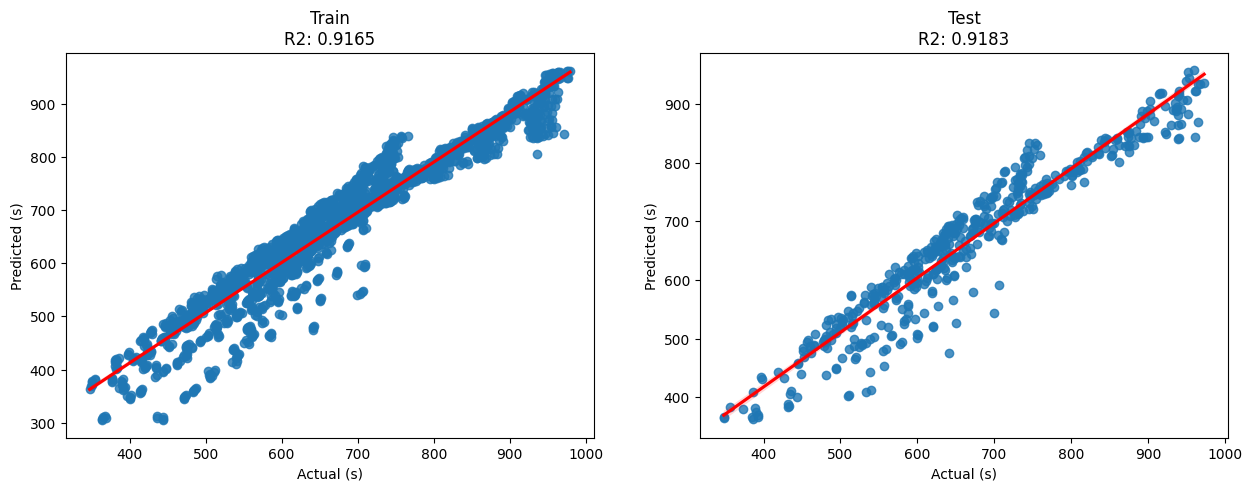

In [177]:
# Prints metrics
svr_r2_train, svr_r2_test = find_r2(y_train,svr_y_train_pred, y_test, svr_y_test_pred)

svr_mae_train, svr_mae_test = find_mae(y_train, svr_y_train_pred, y_test, svr_y_test_pred)

svr_mse_train, svr_mse_test = find_mse(y_train, svr_y_train_pred, y_test, svr_y_test_pred)

svr_rmse_train, svr_rmse_test = find_rmse(y_train, svr_y_train_pred, y_test, svr_y_test_pred)

svr_mape_train, svr_mape_test = find_mape(y_train, svr_y_train_pred, y_test, svr_y_test_pred)

print_metrics(svr_r2_train, svr_r2_test, svr_mae_train, svr_mae_test, svr_mse_train, svr_mse_test, svr_rmse_train, svr_rmse_test, svr_mape_train, svr_mape_test)

print_r2_plots(y_train, svr_y_train_pred, y_test, svr_y_test_pred, svr_r2_train, svr_r2_test)

## 2.7 Decision Tree Regressor

In [178]:
# Create a pipeline with cross-validation
dtr_pipeline = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeRegressor(random_state=21))])
dtr_kf = KFold(n_splits=10, shuffle= True, random_state= 17)
dtr_val_scores = cross_val_score(estimator=dtr_pipeline,  X= X_train, y= y_train, cv= dtr_kf)
dtr_val_scores.mean()

0.9988593802640777

In [516]:
# Apply hyperparameter tuning
dtr_parameters = {
    'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': np.arange(1,9),
    'model__min_samples_split': np.arange(5,10),
    'model__min_samples_leaf': np.arange(5,10),
    'model__min_weight_fraction_leaf': np.linspace(0.0, 0.5)
}

dtr_random = RandomizedSearchCV(
    estimator = dtr_pipeline, 
    param_distributions=dtr_parameters,
    scoring = 'r2',
    cv = dtr_kf,
    n_jobs = -1,
    n_iter=100,
    verbose=True
)

dtr_random.fit(X_train, y_train)

dtr_random.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.961474751177166

In [517]:
dtr_random.best_params_

{'model__splitter': 'random',
 'model__min_weight_fraction_leaf': 0.02040816326530612,
 'model__min_samples_split': 7,
 'model__min_samples_leaf': 5,
 'model__max_depth': 7,
 'model__criterion': 'squared_error'}

In [518]:
dtr_splitter = dtr_random.best_params_['model__splitter']
dtr_min_samples_split = dtr_random.best_params_['model__min_samples_split']
dtr_min_samples_leaf = dtr_random.best_params_['model__min_samples_leaf']
dtr_max_depth = dtr_random.best_params_['model__max_depth']
dtr_criterion = dtr_random.best_params_['model__criterion']
dtr_min_weight_fraction_leaf = dtr_random.best_params_['model__min_weight_fraction_leaf']

In [519]:
# Apply a new pipeline with tuned hyperparameters
dtr_random_chosen = Pipeline([('scaler', StandardScaler()), 
                              ('model', DecisionTreeRegressor(
                                random_state=21,
                                splitter=dtr_splitter, 
                                min_samples_split=dtr_min_samples_split, 
                                min_samples_leaf=dtr_min_samples_leaf, 
                                max_depth=dtr_max_depth, 
                                criterion=dtr_criterion,
                                min_weight_fraction_leaf = dtr_min_weight_fraction_leaf
                                )
                               )])
dtr_random_chosen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeRegressor(max_depth=7, min_samples_leaf=5,
                                       min_samples_split=7,
                                       min_weight_fraction_leaf=0.02040816326530612,
                                       random_state=21, splitter='random'))])

In [180]:
dtr_y_train_pred = dtr_random_chosen.predict(X_train)
dtr_y_test_pred = dtr_random_chosen.predict(X_test)

MAE:    20.63 vs 20.37
MSE:    741.91 vs 718.31
RMSE:   27.24 vs 26.80
MAPE:   0.03 vs 0.03
R2:     0.9631 vs 0.9632


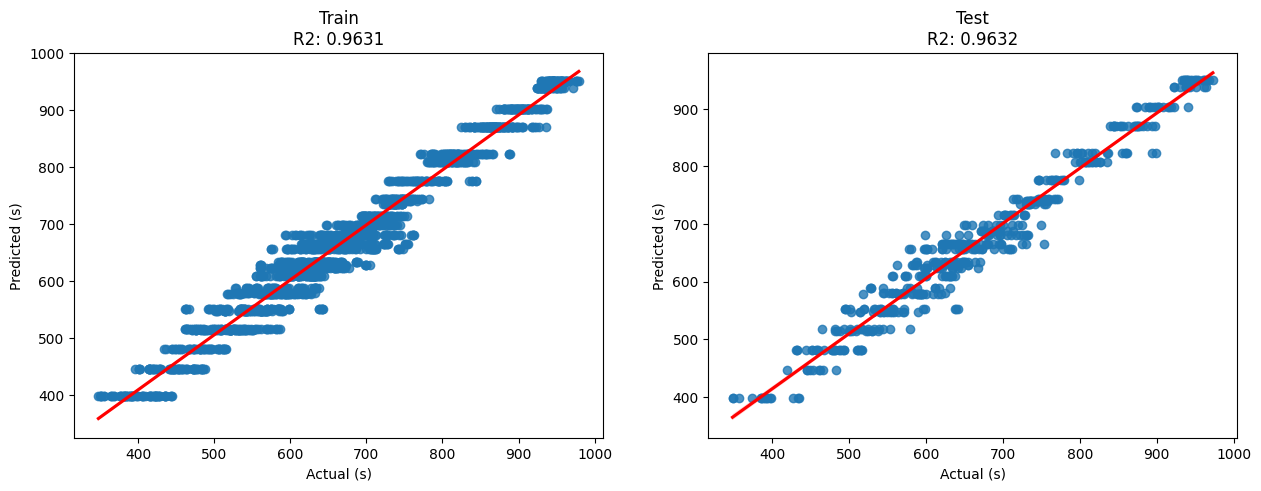

In [181]:
# Prints metrics
dtr_r2_train, dtr_r2_test = find_r2(y_train,dtr_y_train_pred, y_test, dtr_y_test_pred)

dtr_mae_train, dtr_mae_test = find_mae(y_train, dtr_y_train_pred, y_test, dtr_y_test_pred)

dtr_mse_train, dtr_mse_test = find_mse(y_train, dtr_y_train_pred, y_test, dtr_y_test_pred)

dtr_rmse_train, dtr_rmse_test = find_rmse(y_train, dtr_y_train_pred, y_test, dtr_y_test_pred)

dtr_mape_train, dtr_mape_test = find_mape(y_train, dtr_y_train_pred, y_test, dtr_y_test_pred)

print_metrics(dtr_r2_train, dtr_r2_test, dtr_mae_train, dtr_mae_test, dtr_mse_train, dtr_mse_test, dtr_rmse_train, dtr_rmse_test, dtr_mape_train, dtr_mape_test)

print_r2_plots(y_train, dtr_y_train_pred, y_test, dtr_y_test_pred, dtr_r2_train, dtr_r2_test)

## 2.8 Random Forest Regressor

In [182]:
# Create a pipeline with cross-validation
rfr_pipeline = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=21))])
rfr_kf = KFold(n_splits=10, shuffle= True, random_state= 17)
rfr_val_scores = cross_val_score(estimator=rfr_pipeline,  X= X_train, y= y_train, cv= rfr_kf)
rfr_val_scores.mean()

0.9990798270726362

In [700]:
# Apply hyperparameter tuning
rfr_parameters = {
    'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'model__max_depth': [4],
    'model__min_samples_split': np.arange(8, 11),
    'model__min_samples_leaf': np.arange(8, 11),
    'model__n_estimators': np.arange(100,1000),
    'model__max_features': [None],
    'model__min_weight_fraction_leaf': np.linspace(1e-5, 1e-3),
    'model__max_leaf_nodes': np.arange(8,11)
}

rfr_random = RandomizedSearchCV(
    random_state=21,
    estimator = rfr_pipeline,
    param_distributions=rfr_parameters,
    scoring = 'r2',
    cv = rfr_kf,
    n_jobs = -1,
    n_iter=100,
    verbose=True
    )

rfr_random.fit(X_train, y_train)

rfr_random.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.937458942270775

In [701]:
rfr_random.best_params_

{'model__n_estimators': 266,
 'model__min_weight_fraction_leaf': 0.00021204081632653063,
 'model__min_samples_split': 9,
 'model__min_samples_leaf': 9,
 'model__max_leaf_nodes': 10,
 'model__max_features': None,
 'model__max_depth': 4,
 'model__criterion': 'squared_error'}

In [702]:
rfr_n_estimators = rfr_random.best_params_['model__n_estimators']
rfr_min_samples_split = rfr_random.best_params_['model__min_samples_split']
rfr_min_samples_leaf = rfr_random.best_params_['model__min_samples_leaf']
rfr_max_features = rfr_random.best_params_['model__max_features']
rfr_max_depth = rfr_random.best_params_['model__max_depth']
rfr_criterion = rfr_random.best_params_['model__criterion']
rfr_min_weight_fraction_leaf = rfr_random.best_params_['model__min_weight_fraction_leaf']
rfr_max_leaf_nodes = rfr_random.best_params_['model__max_leaf_nodes']

In [703]:
# Apply a new pipeline with tuned hyperparameters
rfr_random_chosen = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(
    n_estimators=rfr_n_estimators, 
    min_samples_split=rfr_min_samples_split, 
    min_samples_leaf=rfr_min_samples_leaf, 
    max_features=rfr_max_features, 
    max_depth=rfr_max_depth, 
    criterion=rfr_criterion,
    min_weight_fraction_leaf=rfr_min_weight_fraction_leaf,
    max_leaf_nodes=rfr_max_leaf_nodes
    ))])
rfr_random_chosen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=4, max_features=None,
                                       max_leaf_nodes=10, min_samples_leaf=9,
                                       min_samples_split=9,
                                       min_weight_fraction_leaf=0.00021204081632653063,
                                       n_estimators=266))])

In [184]:
rfr_y_train_pred = rfr_random_chosen.predict(X_train)
rfr_y_test_pred = rfr_random_chosen.predict(X_test)

MAE:    27.57 vs 26.40
MSE:    1200.02 vs 1145.84
RMSE:   34.64 vs 33.85
MAPE:   0.04 vs 0.04
R2:     0.9403 vs 0.9413


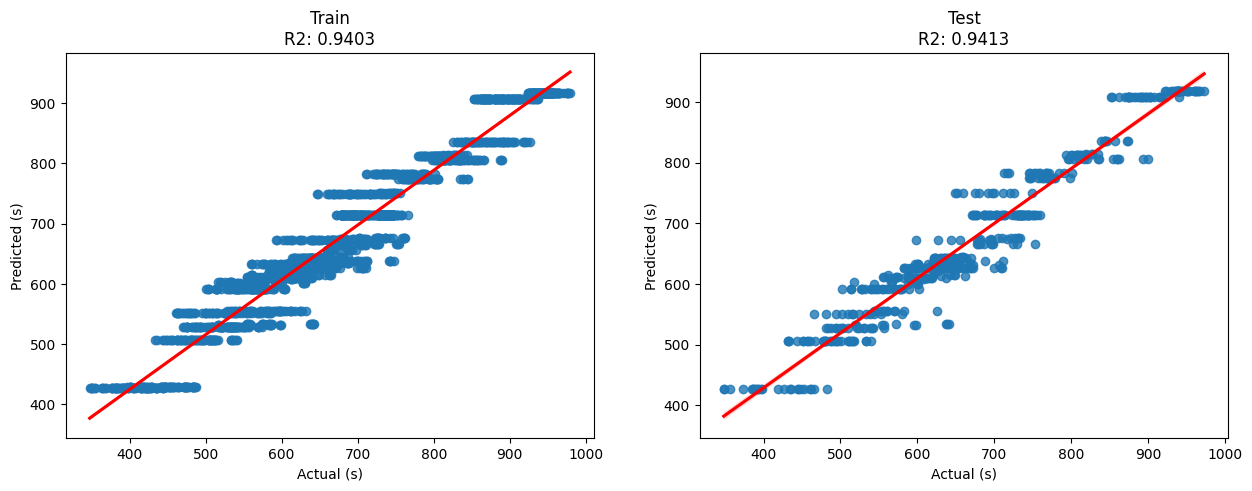

In [186]:
# Prints metrics
rfr_r2_train, rfr_r2_test = find_r2(y_train,rfr_y_train_pred, y_test, rfr_y_test_pred)

rfr_mae_train, rfr_mae_test = find_mae(y_train, rfr_y_train_pred, y_test, rfr_y_test_pred)

rfr_mse_train, rfr_mse_test = find_mse(y_train, rfr_y_train_pred, y_test, rfr_y_test_pred)

rfr_rmse_train, rfr_rmse_test = find_rmse(y_train, rfr_y_train_pred, y_test, rfr_y_test_pred)

rfr_mape_train, rfr_mape_test = find_mape(y_train, rfr_y_train_pred, y_test, rfr_y_test_pred)

print_metrics(rfr_r2_train, rfr_r2_test, rfr_mae_train, rfr_mae_test, rfr_mse_train, rfr_mse_test, rfr_rmse_train, rfr_rmse_test, rfr_mape_train, rfr_mape_test)

print_r2_plots(y_train, rfr_y_train_pred, y_test, rfr_y_test_pred, rfr_r2_train, rfr_r2_test)

## 2.9 XGBoost

In [187]:
# Create a pipeline with cross-validation
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('model', XGBRegressor())])
xgb_kf = KFold(n_splits=10, shuffle= True, random_state= 17)
xgb_val_scores = cross_val_score(estimator=xgb_pipeline,  X= X_train, y= y_train, cv= xgb_kf)
xgb_val_scores.mean()

0.999419977517577

In [814]:
# Apply hyperparameter tuning
xgb_parameters = {
    'model__max_depth': np.arange(1,3),
    'model__n_estimators': np.arange(10,100),
    'model__max_leaves': np.arange(3,5),
    'model__gamma': np.arange(1e4, 1e6)
}

xgb_random = RandomizedSearchCV(estimator = xgb_pipeline, 
                           param_distributions=xgb_parameters,
                           scoring = 'r2',
                           cv = xgb_kf,
                           n_jobs = -1,
                           n_iter=100,
                           verbose=True)

xgb_random.fit(X_train, y_train)

xgb_random.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.9782955045799566

In [815]:
xgb_random.best_params_

{'model__n_estimators': 51,
 'model__max_leaves': 4,
 'model__max_depth': 2,
 'model__gamma': 42301.0}

In [817]:
xgb_n_estimators = xgb_random.best_params_['model__n_estimators']
xgb_max_depth = xgb_random.best_params_['model__max_depth']
xgb_max_leaves = xgb_random.best_params_['model__max_leaves']
xgb_gamma = xgb_random.best_params_['model__gamma']

In [818]:
# Apply a new pipeline with tuned hyperparameters
xgb_random_chosen = Pipeline([('scaler', StandardScaler()), 
                              ('model', XGBRegressor(
                                  max_depth=xgb_max_depth,
                                  n_estimators=xgb_n_estimators,
                                  max_leaves=xgb_max_leaves,
                                  gamma=xgb_gamma
                                  ))])
xgb_random_chosen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=42301.0,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_leaves=4, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=51, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [189]:
xgb_y_train_pred = xgb_random_chosen.predict(X_train)
xgb_y_test_pred = xgb_random_chosen.predict(X_test)

MAE:    15.70 vs 15.20
MSE:    422.43 vs 401.88
RMSE:   20.55 vs 20.05
MAPE:   0.03 vs 0.03
R2:     0.9790 vs 0.9794


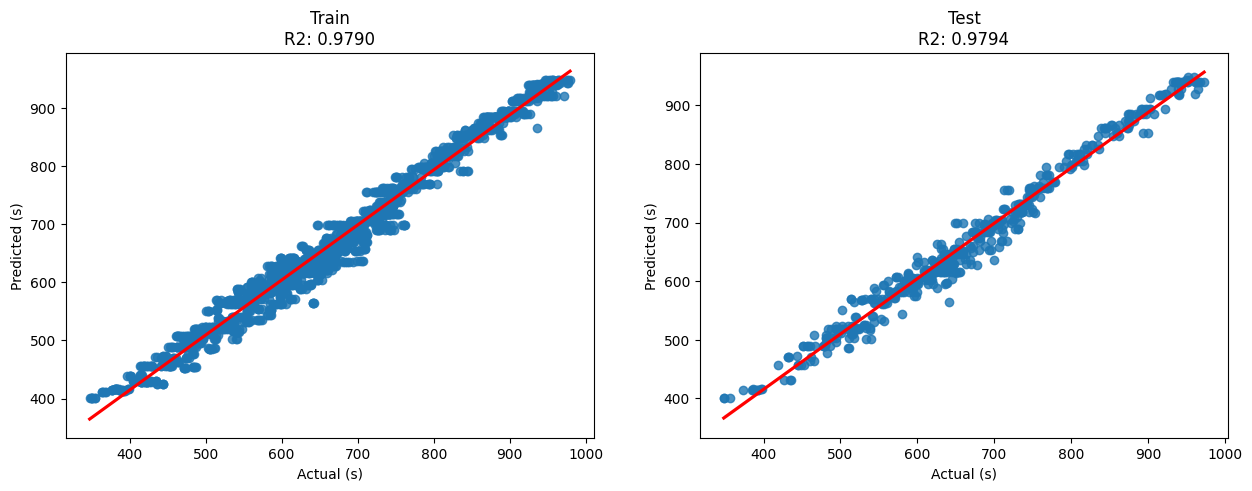

In [190]:
# Prints metrics
xgb_r2_train, xgb_r2_test = find_r2(y_train,xgb_y_train_pred, y_test, xgb_y_test_pred)

xgb_mae_train, xgb_mae_test = find_mae(y_train, xgb_y_train_pred, y_test, xgb_y_test_pred)

xgb_mse_train, xgb_mse_test = find_mse(y_train, xgb_y_train_pred, y_test, xgb_y_test_pred)

xgb_rmse_train, xgb_rmse_test = find_rmse(y_train, xgb_y_train_pred, y_test, xgb_y_test_pred)

xgb_mape_train, xgb_mape_test = find_mape(y_train, xgb_y_train_pred, y_test, xgb_y_test_pred)

print_metrics(xgb_r2_train, xgb_r2_test, xgb_mae_train, xgb_mae_test, xgb_mse_train, xgb_mse_test, xgb_rmse_train, xgb_rmse_test, xgb_mape_train, xgb_mape_test)

print_r2_plots(y_train, xgb_y_train_pred, y_test, xgb_y_test_pred, xgb_r2_train, xgb_r2_test)

## 2.10 Gradient Boosting Regressor

In [1013]:
# Create a pipeline with cross-validation
gbr_pipeline = Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingRegressor(random_state=21))])
gbr_kf = KFold(n_splits=10, shuffle= True, random_state= 17)
gbr_val_scores = cross_val_score(estimator=gbr_pipeline,  X= X_train, y= y_train, cv= gbr_kf)
gbr_val_scores.mean()

0.9954045931097874

In [1015]:
# Apply hyperparameter tuning
gbr_parameters = {
    'model__loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'model__learning_rate': np.linspace(1e-3, 1e-2),
    'model__n_estimators': np.arange(50, 1000, step=50),
    'model__max_depth': np.arange(1,4),
    'model__criterion': ['friedman_mse', 'squared_error'],
    'model__max_features': ['sqrt', 'log2'],
    'model__alpha': np.linspace(0, 1, num=10),
    'model__tol': np.linspace(1e-4, 1e-2, num=10),
    'model__min_samples_split': np.arange(300,500, step=50),
    'model__min_samples_leaf': np.arange(300,500, step=50)  
}

gbr_random = RandomizedSearchCV(
    estimator = gbr_pipeline, 
    param_distributions=gbr_parameters,
    scoring = 'r2',
    cv = gbr_kf,
    n_jobs = -1,
    n_iter=100,
    verbose=True
)

gbr_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\Siwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
230 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Siwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Siwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              GradientBoostingRegressor(random_state=21))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'model__cri...
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': array([300, 350, 400, 450]),
                                        'model__min_samples_split': array([300, 350, 400, 450]),
                                        'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950]),
                                        'model__tol': array([0.0001, 0.0012, 0.0023, 0.0034, 0.0045, 0.0056, 0.0067, 0.0078,
       0.0089, 0.01  ])},
                   scoring='r2', verbose=True)

In [1016]:
gbr_random.best_score_

0.9305263858250938

In [1017]:
gbr_random.best_params_

{'model__tol': 0.0023,
 'model__n_estimators': 700,
 'model__min_samples_split': 300,
 'model__min_samples_leaf': 300,
 'model__max_features': 'log2',
 'model__max_depth': 3,
 'model__loss': 'huber',
 'model__learning_rate': 0.005959183673469389,
 'model__criterion': 'friedman_mse',
 'model__alpha': 0.2222222222222222}

In [1018]:
gbr_tol = gbr_random.best_params_['model__tol']
gbr_n_estimators = gbr_random.best_params_['model__n_estimators']
gbr_min_samples_split = gbr_random.best_params_['model__min_samples_split']
gbr_min_samples_leaf = gbr_random.best_params_['model__min_samples_leaf']
gbr_max_features = gbr_random.best_params_['model__max_features']
gbr_max_depth = gbr_random.best_params_['model__max_depth']
gbr_loss = gbr_random.best_params_['model__loss']
gbr_loss = gbr_random.best_params_['model__loss']
gbr_learning_rate = gbr_random.best_params_['model__learning_rate']
gbr_criterion = gbr_random.best_params_['model__criterion']
gbr_alpha = gbr_random.best_params_['model__alpha']

In [1019]:
# Apply a new pipeline with tuned hyperparameters
gbr_random_chosen = Pipeline([('scaler', StandardScaler()),
                              ('model', GradientBoostingRegressor(
                                  random_state=21,
                                  tol=gbr_tol,
                                  n_estimators=gbr_n_estimators,
                                  min_samples_leaf=gbr_min_samples_leaf,
                                  min_samples_split=gbr_min_samples_split,
                                  max_features=gbr_max_features,
                                  max_depth=gbr_max_depth,
                                  loss=gbr_loss,
                                  learning_rate=gbr_learning_rate,
                                  criterion=gbr_criterion,
                                  alpha=gbr_alpha
                              ))])
gbr_random_chosen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingRegressor(alpha=0.2222222222222222,
                                           learning_rate=0.005959183673469389,
                                           loss='huber', max_features='log2',
                                           min_samples_leaf=300,
                                           min_samples_split=300,
                                           n_estimators=700, random_state=21,
                                           tol=0.0023))])

In [192]:
gbr_y_train_pred = gbr_random_chosen.predict(X_train)
gbr_y_test_pred = gbr_random_chosen.predict(X_test)

MAE:    25.61 vs 24.92
MSE:    1291.26 vs 1249.40
RMSE:   35.93 vs 35.35
MAPE:   0.04 vs 0.04
R2:     0.9357 vs 0.9360


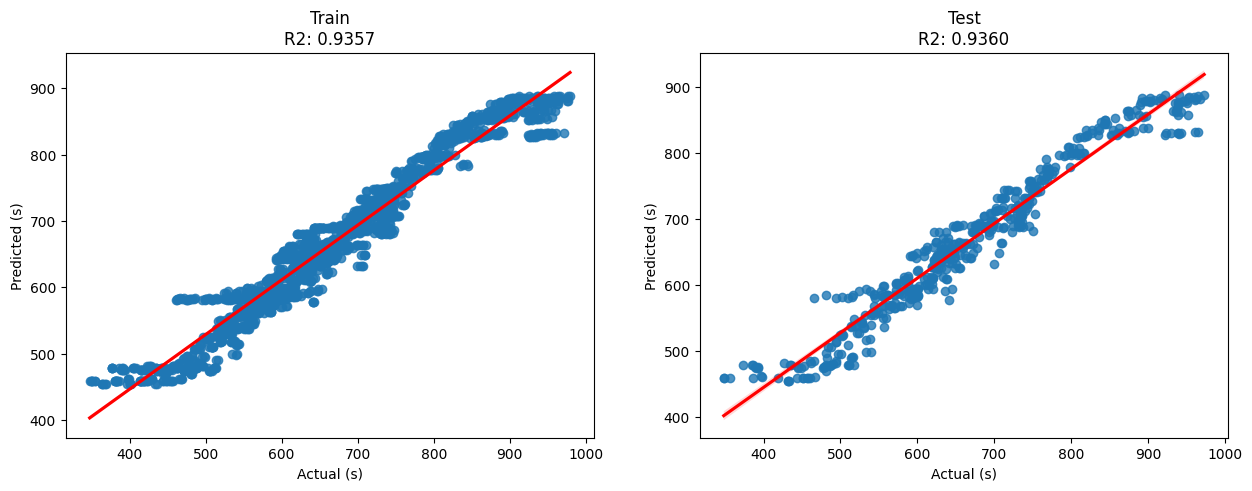

In [193]:
# Prints metrics
gbr_r2_train, gbr_r2_test = find_r2(y_train,gbr_y_train_pred, y_test, gbr_y_test_pred)

gbr_mae_train, gbr_mae_test = find_mae(y_train, gbr_y_train_pred, y_test, gbr_y_test_pred)

gbr_mse_train, gbr_mse_test = find_mse(y_train, gbr_y_train_pred, y_test, gbr_y_test_pred)

gbr_rmse_train, gbr_rmse_test = find_rmse(y_train, gbr_y_train_pred, y_test, gbr_y_test_pred)

gbr_mape_train, gbr_mape_test = find_mape(y_train, gbr_y_train_pred, y_test, gbr_y_test_pred)

print_metrics(gbr_r2_train, gbr_r2_test, gbr_mae_train, gbr_mae_test, gbr_mse_train, gbr_mse_test, gbr_rmse_train, gbr_rmse_test, gbr_mape_train, gbr_mape_test)

print_r2_plots(y_train, gbr_y_train_pred, y_test, gbr_y_test_pred, gbr_r2_train, gbr_r2_test)

## 2.11 Neural Network

In [40]:
# Define a function that neural network model
def make_nn_model(X_train_scaled):
    nn_model = Sequential(
        [
            tf.keras.Input(shape=(X_train_scaled.shape[-1],)),
            Dense(units=3, activation='relu'),
            Dense(units=1, activation='relu')
        ]
    )
    return nn_model

In [41]:
optimizer = ['SGD', 'RMSprop', 'Adam']

In [42]:
model = make_nn_model(X_train_scaled)
nn_model = KerasRegressor(model=model, loss='mean_squared_error', epochs=100, batch_size=10, optimizer='adam')

In [43]:
nn_kf = KFold(n_splits=10, shuffle= True, random_state= 17)

In [44]:
# Apply hyperparameter tuning
nn_parameters = {
    'optimizer': optimizer,
    'optimizer__learning_rate': np.linspace(1e-2, 1.0),
    'batch_size': np.arange(10, 61),
    'epochs': np.arange(10, 101)
}

early_stopping_cb = EarlyStopping(patience=10, monitor='val_loss')
early_stopping_mc = ModelCheckpoint("best_model.keras")

nn_random = RandomizedSearchCV(estimator = nn_model, 
                           param_distributions=nn_parameters,
                           scoring = 'r2',
                           cv = nn_kf,
                           n_jobs = -1,
                           n_iter=100,
                           verbose=True)

nn_random_results = nn_random.fit(X_train_scaled, y_train, callbacks=[early_stopping_mc, early_stopping_cb])
nn_random_results.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Epoch 1/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 448727.0938   
Epoch 2/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 163339.1406
Epoch 3/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 19620.2793
Epoch 4/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 8487.9336
Epoch 5/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 4494.6465
Epoch 6/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 2680.3364
Epoch 7/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 2002.7440
Epoch 8/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 1774.9778
Epoch 9/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 1694.3456
Epoch 10/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 1659.2589
Epoch 11/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 1637.8009
Epoch 12/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 1621.1844
Epoch 13/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 1606.1681
Epoch 14/99
36/

0.9729077830489794

In [45]:
print("Best: %f using %s" % (nn_random_results.best_score_, nn_random_results.best_params_))
means = nn_random_results.cv_results_['mean_test_score']
stds = nn_random_results.cv_results_['std_test_score']
params = nn_random_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972908 using {'optimizer__learning_rate': 0.19183673469387755, 'optimizer': 'Adam', 'epochs': 99, 'batch_size': 58}
0.870725 (0.117218) with: {'optimizer__learning_rate': 0.9797959183673469, 'optimizer': 'RMSprop', 'epochs': 61, 'batch_size': 14}
0.824014 (0.134067) with: {'optimizer__learning_rate': 0.8787755102040816, 'optimizer': 'RMSprop', 'epochs': 98, 'batch_size': 36}
-22.673776 (1.884374) with: {'optimizer__learning_rate': 0.6363265306122449, 'optimizer': 'SGD', 'epochs': 97, 'batch_size': 38}
0.965186 (0.013961) with: {'optimizer__learning_rate': 0.6161224489795918, 'optimizer': 'Adam', 'epochs': 44, 'batch_size': 27}
0.958628 (0.013092) with: {'optimizer__learning_rate': 0.9595918367346938, 'optimizer': 'Adam', 'epochs': 23, 'batch_size': 20}
0.930385 (0.052922) with: {'optimizer__learning_rate': 0.5959183673469388, 'optimizer': 'RMSprop', 'epochs': 49, 'batch_size': 14}
-21.647972 (3.261227) with: {'optimizer__learning_rate': 0.05040816326530612, 'optimizer': 'SGD', 

In [46]:
nn_random.best_params_

{'optimizer__learning_rate': 0.19183673469387755,
 'optimizer': 'Adam',
 'epochs': 99,
 'batch_size': 58}

In [48]:
nn_optimizer__learning_rate = nn_random.best_params_['optimizer__learning_rate']
nn_optimizer = nn_random.best_params_['optimizer']
nn_epochs = nn_random.best_params_['epochs']
nn_batch_size = nn_random.best_params_['batch_size']

In [67]:
# Apply a new pipeline with tuned hyperparameters
nn_random_chosen = Sequential(
        [
            tf.keras.Input(shape=(X_train_scaled.shape[-1],)),
            Dense(units=3, activation='relu'),
            Dense(units=1, activation='relu')
        ]
    )
    
nn_random_chosen.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=nn_optimizer__learning_rate)
)

nn_random_chosen.fit(X_train_scaled, y_train, epochs=nn_epochs, batch_size=nn_batch_size)

Epoch 1/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 434218.6250 
Epoch 2/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 110722.7578
Epoch 3/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 12144.8994
Epoch 4/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 6343.5298
Epoch 5/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 3520.1228
Epoch 6/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 1902.3799
Epoch 7/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1207.6458
Epoch 8/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 961.2773
Epoch 9/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 838.7754
Epoch 10/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 761.6257
Epoch 11/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 711.7810
Epoch 12/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 682.4846
Epoch 13/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 666.6442
Epoch 14/99
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 655.6397
Epoch 15/99
36/3

In [196]:
nn_y_train_pred = nn_random_chosen.predict(X_train_scaled)
nn_y_test_pred = nn_random_chosen.predict(X_test_scaled)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


MAE:    18.94 vs 18.31
MSE:    631.91 vs 606.09
RMSE:   25.14 vs 24.62
MAPE:   0.03 vs 0.03
R2:     0.9685 vs 0.9690


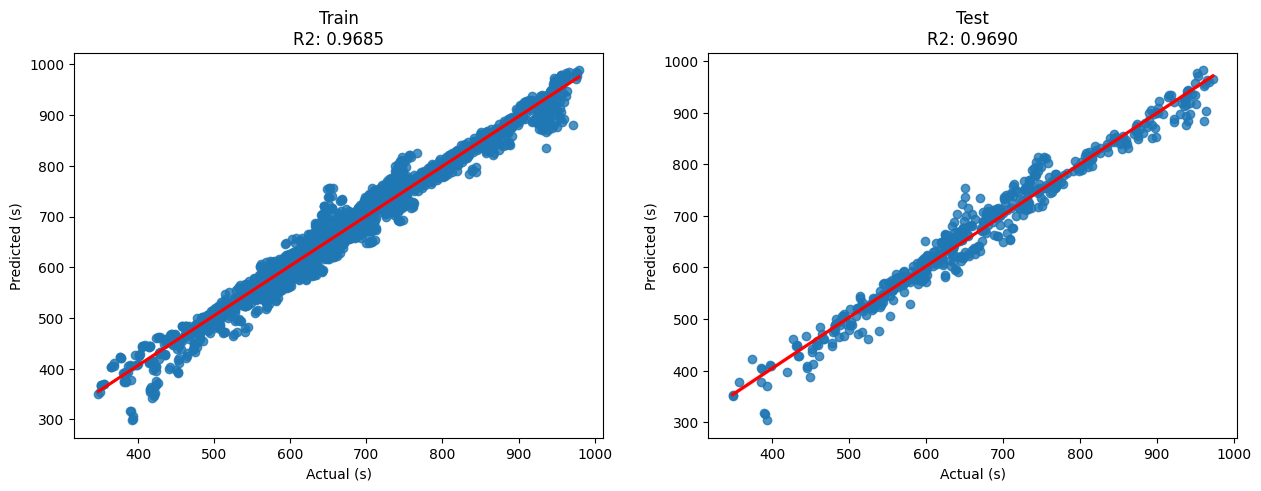

In [197]:
# Prints metrics
nn_r2_train, nn_r2_test = find_r2(y_train,nn_y_train_pred, y_test, nn_y_test_pred)

nn_mae_train, nn_mae_test = find_mae(y_train, nn_y_train_pred, y_test, nn_y_test_pred)

nn_mse_train, nn_mse_test = find_mse(y_train, nn_y_train_pred, y_test, nn_y_test_pred)

nn_rmse_train, nn_rmse_test = find_rmse(y_train, nn_y_train_pred, y_test, nn_y_test_pred)

nn_mape_train, nn_mape_test = find_mape(y_train, nn_y_train_pred, y_test, nn_y_test_pred)

print_metrics(nn_r2_train, nn_r2_test, nn_mae_train, nn_mae_test, nn_mse_train, nn_mse_test, nn_rmse_train, nn_rmse_test, nn_mape_train, nn_mape_test)

print_r2_plots(y_train, nn_y_train_pred, y_test, nn_y_test_pred, nn_r2_train, nn_r2_test)

# 3. Summary

In [203]:
types = ('Linear', 'Polynomial\n(deg=4)', 'Ridge', 'Lasso', 'K-Nearest', 'SVR', 'Decision\nTree', 'Random\nForest', 'XGBoost', 'Gradient\nBoosting', 'Neural\nNetwork')
idx = ['R2_Train', 'R2_Test', 'MAE_Train', 'MAE_Test', 'MSE_Train', 'MSE_Test', 'RMSE_Train', 'RMSE_Test', 'MAPE_Train', 'MAPE_Test']

In [235]:
var_list = pd.read_csv('metrics.csv', index_col='Unnamed: 0')
var_list

,Linear,Polynomial\n(deg=4),Ridge,Lasso,SVR,Decision\nTree,Random\nForest,XGBoost,Gradient\nBoosting,Neural\nNetwork
R2_Train,0.920400,0.989811,0.989811,0.989787,0.916522,0.963067,0.940261,0.978971,0.935719,0.968543
R2_Test,0.922125,0.990166,0.990161,0.990038,0.918280,0.963206,0.941306,0.979414,0.936001,0.968954
MAE_Train,32.524870,10.688277,10.691529,10.701744,31.578344,20.630849,27.568752,15.704961,25.606869,18.944377
MAE_Test,31.848275,10.315559,10.323303,10.397861,31.481174,20.366804,26.398933,15.196638,24.921783,18.313097
MSE_Train,1599.000942,204.667497,204.670562,205.152121,1676.895438,741.909494,1200.022274,422.428845,1291.260785,631.913473
MSE_Test,1520.311685,191.989513,192.082486,194.486056,1595.368347,718.306130,1145.836442,401.877942,1249.403486,606.087581
RMSE_Train,39.987510,14.306205,14.306312,14.323132,40.949914,27.238016,34.641338,20.553074,35.934117,25.137889
RMSE_Test,38.991174,13.856028,13.859383,13.945826,39.942062,26.801234,33.850206,20.046894,35.346902,24.618846
MAPE_Train,0.051220,0.017514,0.017518,0.017523,0.049898,0.033394,0.043713,0.025761,0.040479,0.029669
MAPE_Test,0.049647,0.016516,0.016525,0.016624,0.049144,0.032974,0.042561,0.025038,0.039435,0.028620


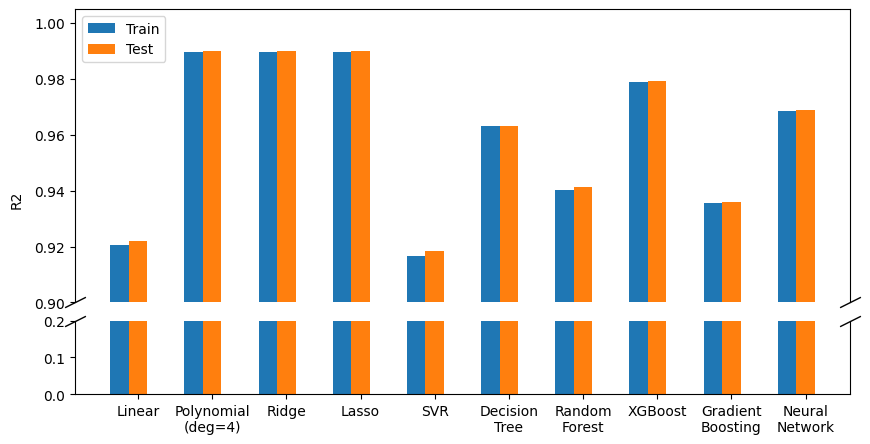

In [320]:
# R-squared
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5), gridspec_kw={'height_ratios':[4,1]})
fig.subplots_adjust(hspace=0.1)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(bottom=False)

d = .5 
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)


width = 0.25
multiplier = 1
x = np.arange(len(types))
offset = width * multiplier

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.bar(x, var_list.loc["R2_Train"], width, label='Train')
ax2.bar(x, var_list.loc["R2_Train"], width, label='Train')
ax1.bar(x + offset, var_list.loc["R2_Test"], width, label='Test')
ax2.bar(x + offset, var_list.loc["R2_Test"], width, label='Test')


ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xticks(x + width, types, rotation=45)

ax1.set_ylim(0.9,1.005)
ax2.set_ylim(0,0.2)
ax1.legend(loc='upper left')
fig.text(0.06, 0.50, "R2", va='center', rotation = 'vertical')

plt.show()

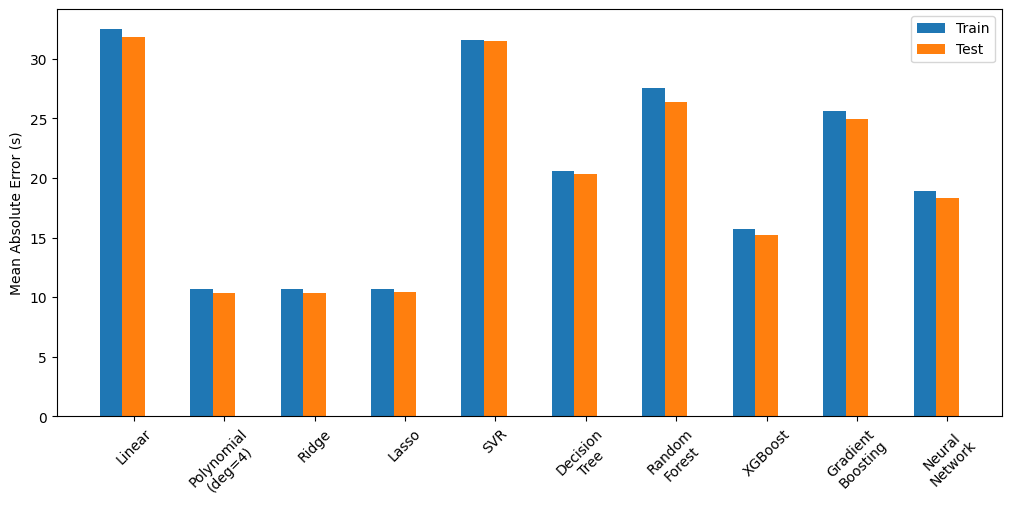

In [237]:
# Mean Absolute Error
fig, ax = plt.subplots(layout='constrained', figsize=(10,5))
width = 0.25
multiplier = 1
x = np.arange(len(types))
offset = width * multiplier


ax.bar(x, var_list.loc["MAE_Train"], width, label='Train')
ax.bar(x + offset, var_list.loc["MAE_Test"], width, label='Test')

    
ax.set_xticks(x + width, types, rotation=45)
ax.set_ylabel('Mean Absolute Error (s)')
ax.legend(loc='upper right')
plt.show()

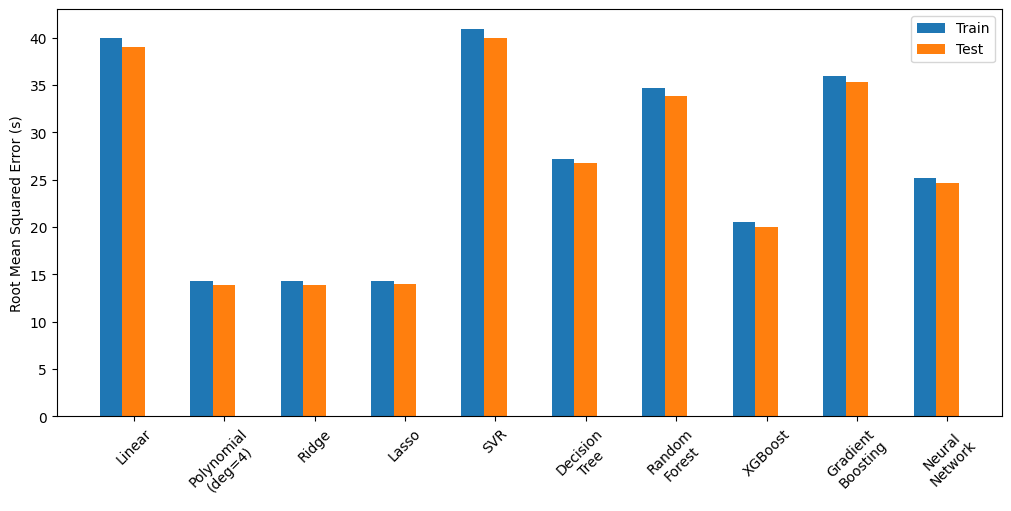

In [238]:
# Root Mean Squared Error
fig, ax = plt.subplots(layout='constrained', figsize=(10,5))
width = 0.25
multiplier = 1
x = np.arange(len(types))
offset = width * multiplier


ax.bar(x, var_list.loc["RMSE_Train"], width, label='Train')
ax.bar(x + offset, var_list.loc["RMSE_Test"], width, label='Test')
var_list
    
ax.set_xticks(x + width, types, rotation=45)
ax.set_ylabel('Root Mean Squared Error (s)')
ax.legend(loc='upper right')
plt.show()

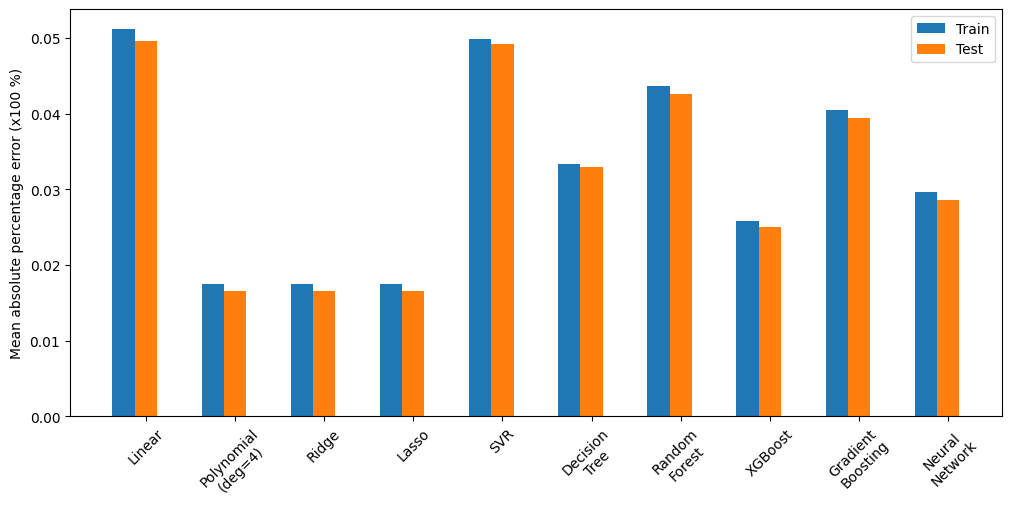

In [243]:
# Mean Absolute Percentage Error
fig, ax = plt.subplots(layout='constrained', figsize=(10,5))
width = 0.25
multiplier = 1
x = np.arange(len(types))
offset = width * multiplier


ax.bar(x, var_list.loc["MAPE_Train"], width, label='Train')
ax.bar(x + offset, var_list.loc["MAPE_Test"], width, label='Test')
var_list
    
ax.set_xticks(x + width, types, rotation=45)
ax.set_ylabel('Mean absolute percentage error (x100 %)')
ax.legend(loc='upper right')
plt.show()